Imports

In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

set resourse for use in the training

In [2]:
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" 
print(f"Using device: {device}")

Using device: mps


fetch data from sklearn

In [3]:
data = fetch_california_housing()

List features

In [4]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


useing pandas for sorting and reordering data

In [5]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# sort by target
df = df.sort_values(by='target')
x = df.drop('target', axis=1)
y = df['target']
# # normalize
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Split into training, validation, and test sets
x_train_raw, x_temp, y_train_raw, y_temp = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)
x_val_raw, x_test_raw, y_val_raw, y_test_raw = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42,shuffle=True)


# Print the sizes of each set
print(f"Train set size: {len(x_train_raw)}")
print(f"Validation set size: {len(x_val_raw)}")
print(f"Test set size: {len(x_test_raw)}")
df.head()

Train set size: 16512
Validation set size: 2064
Test set size: 2064


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
9188,4.1932,52.0,3.568889,1.186667,628.0,2.791111,34.24,-117.86,0.14999
19802,0.5360,36.0,12.250000,3.500000,18.0,2.250000,40.31,-123.17,0.14999
2799,2.1000,19.0,3.774390,1.457317,490.0,2.987805,36.40,-117.02,0.14999
2521,1.6607,16.0,6.710526,1.921053,85.0,2.236842,39.71,-122.74,0.14999
5887,2.3667,39.0,3.572464,1.217391,259.0,1.876812,34.15,-118.33,0.17500


convert data to tensor

In [6]:
x_train_tensor = torch.tensor(x_train_raw, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_raw.values, dtype=torch.float32).view(-1, 1)
x_val_tensor = torch.tensor(x_val_raw, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_raw.values, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test_raw, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_raw.values, dtype=torch.float32).view(-1, 1)

print("x_train_tensor shape:", x_train_tensor.shape)
print("x_test_tensor shape:", x_test_tensor.shape)
print("x_val_tensor shape:", x_val_tensor.shape)
print("y_val_tensor shape:", y_val_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

x_train_tensor shape: torch.Size([16512, 8])
x_test_tensor shape: torch.Size([2064, 8])
x_val_tensor shape: torch.Size([2064, 8])
y_val_tensor shape: torch.Size([2064, 1])
y_train_tensor shape: torch.Size([16512, 1])
y_test_tensor shape: torch.Size([2064, 1])


show heatmap

<Axes: >

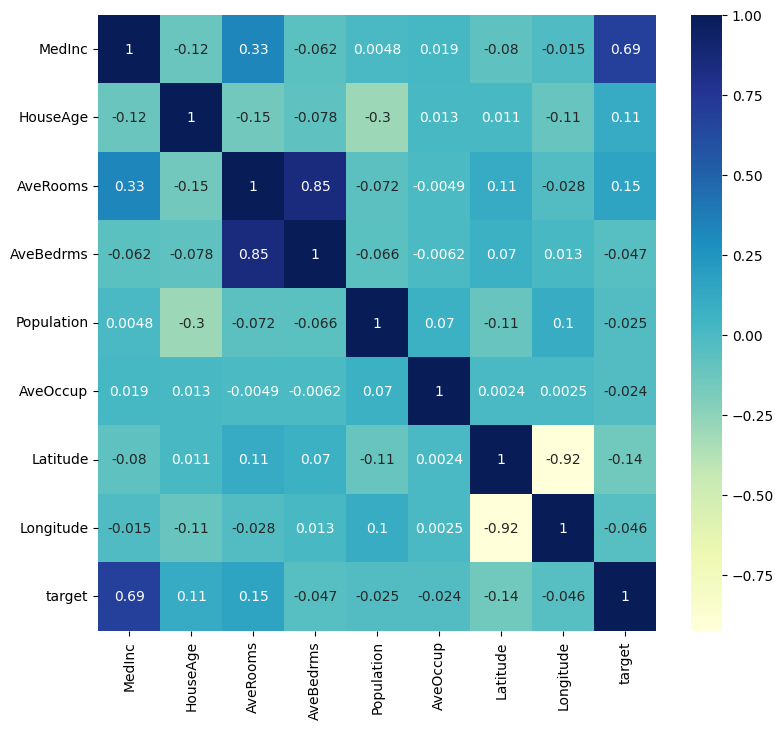

In [7]:
df.corr()
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

show the table

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


create model with sequential syntax

In [9]:
cfh = nn.Sequential(
    nn.Linear(8, 64),
    nn.LeakyReLU(),
    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.Linear(32, 8),
    nn.LeakyReLU(),
    nn.Linear(8, 1)
)
print(cfh)

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=32, out_features=8, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=8, out_features=1, bias=True)
)


In [10]:
torch.save(cfh.state_dict(), 'cfh_empty.pth')

loss function and optimizer

In [11]:
loss_fn = nn.MSELoss() #  Mean squared error
optimizer = optim.Adam(cfh.parameters(), lr=0.001)

In [12]:
import torch
import sklearn.metrics as metrics

def calculate_accuracy(predictions, labels):
    predictions = predictions.int()
    labels = labels.int()

    if predictions.shape != labels.shape:
        raise ValueError("The shapes of the predictions and labels must match.")
    predictions_np = predictions.detach().cpu().numpy()
    labels_np = labels.detach().cpu().numpy()

    confusion_matrix = metrics.confusion_matrix(labels_np, predictions_np)
    accuracy = metrics.accuracy_score(labels_np, predictions_np)

    return accuracy, confusion_matrix


traning variables

In [13]:
epochs = 100
batch_size = 64
train_history = []
val_history = []
best_val_loss = np.inf
train_loss = 0
trian_accuracy = []
val_accuracy = []
best_acc_train = 0
best_acc_val = 0

In [14]:
best_accuracy = 0
for epoch in range(epochs):
    for i in range(0, len(x_train_tensor), batch_size):
        cfh.train()
        Xbatch = x_train_tensor[i:i + batch_size]
        ybatch = y_train_tensor[i:i + batch_size]
        y_pred = cfh(Xbatch)
        train_loss = loss_fn(y_pred, ybatch)
        acc_trian = calculate_accuracy(y_pred, ybatch)
        trian_accuracy.append(acc_trian[0])
        if acc_trian[0] >= best_acc_train:
            best_acc_train = acc_trian[0]
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Validation
        cfh.eval()
        with torch.inference_mode():
            val_pred = cfh(x_val_tensor)
            val_loss = loss_fn(val_pred, y_val_tensor)
            acc_val = calculate_accuracy(y_pred, ybatch)
            val_accuracy.append(acc_trian[0])
            if acc_val[0] >= best_acc_val:
                best_acc_val = acc_val[0]
        if val_loss < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = copy.deepcopy(cfh.state_dict())

    # print(f"Epoch: {epoch + 1}/{epochs} "
    #       f"Train Loss: {train_loss.item():.6f} "
    #       f"Validation Loss: {val_loss.item():.6f} "
    #       f"| Best V loss: {best_val_loss:.6f}")
    print(f"Epoch: {epoch + 1}/{epochs} "
          f"T Loss: {train_loss.item():.6f} "
          f"T Acc: {acc_trian[0]:.6f} "
          f"| V Loss: {val_loss.item():.6f} "
          f" V acc: {acc_val[0]:.6f} "
          f"Best V loss: {best_val_loss:.6f}")
    train_history.append(train_loss.item())
    val_history.append(val_loss.item())

print("Best Train Accuracy: %.4f" % best_acc_train)
print("Best validn Accuracy: %.4f" % best_acc_val)
print("Best Validation Loss: %.4f" % best_val_loss)



Epoch: 1/100 T Loss: 0.700488 T Acc: 0.343750 | V Loss: 0.801979  V acc: 0.343750 Best V loss: 0.801979
Epoch: 2/100 T Loss: 0.502051 T Acc: 0.468750 | V Loss: 0.551864  V acc: 0.468750 Best V loss: 0.551405
Epoch: 3/100 T Loss: 0.490009 T Acc: 0.437500 | V Loss: 0.526178  V acc: 0.437500 Best V loss: 0.526100
Epoch: 4/100 T Loss: 0.486860 T Acc: 0.406250 | V Loss: 0.509843  V acc: 0.406250 Best V loss: 0.509843
Epoch: 5/100 T Loss: 0.485778 T Acc: 0.406250 | V Loss: 0.499928  V acc: 0.406250 Best V loss: 0.499306
Epoch: 6/100 T Loss: 0.483673 T Acc: 0.375000 | V Loss: 0.493199  V acc: 0.375000 Best V loss: 0.492065
Epoch: 7/100 T Loss: 0.481078 T Acc: 0.406250 | V Loss: 0.487904  V acc: 0.406250 Best V loss: 0.486735
Epoch: 8/100 T Loss: 0.478436 T Acc: 0.437500 | V Loss: 0.483557  V acc: 0.437500 Best V loss: 0.482120
Epoch: 9/100 T Loss: 0.476412 T Acc: 0.437500 | V Loss: 0.479906  V acc: 0.437500 Best V loss: 0.478034
Epoch: 10/100 T Loss: 0.473662 T Acc: 0.421875 | V Loss: 0.47659

training and loss chart

100 100


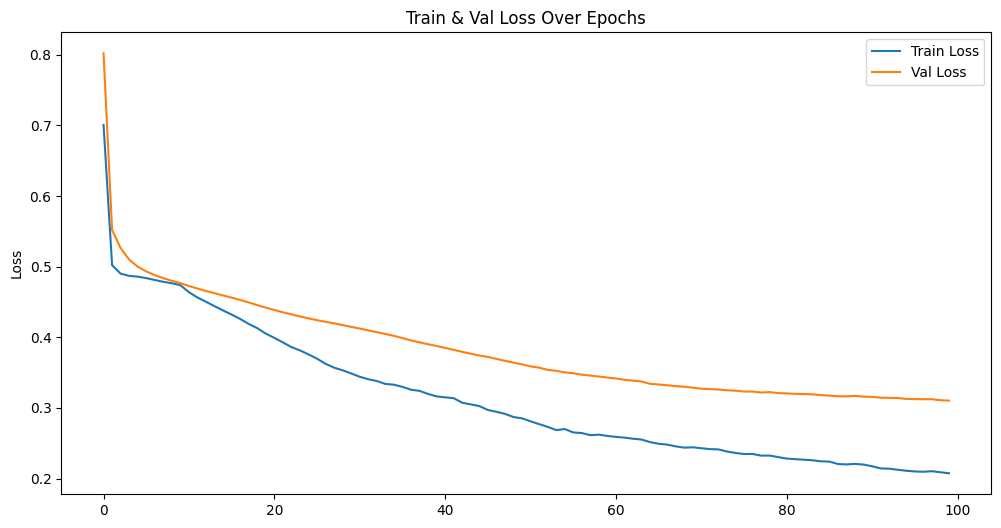

In [24]:
print(len(train_history), len(val_history))
plt.figure(figsize=(12, 6))
plt.plot(train_history, label='Train Loss')
plt.plot(val_history, label='Val Loss')
plt.ylabel('Loss')
plt.title('Train & Val Loss Over Epochs')
plt.legend()
plt.show()

save model

In [16]:
torch.save(cfh.state_dict(), 'cfh.pth')

load model

In [25]:
cfh.load_state_dict(torch.load('cfh.pth'))
cfh.eval()

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=32, out_features=8, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=8, out_features=1, bias=True)
)

Test variables

In [18]:
batch_size = 32
test_reals = []
test_preds = []
test_losses = []
test_loss = 0

Test loop

/opt/homebrew/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2064, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


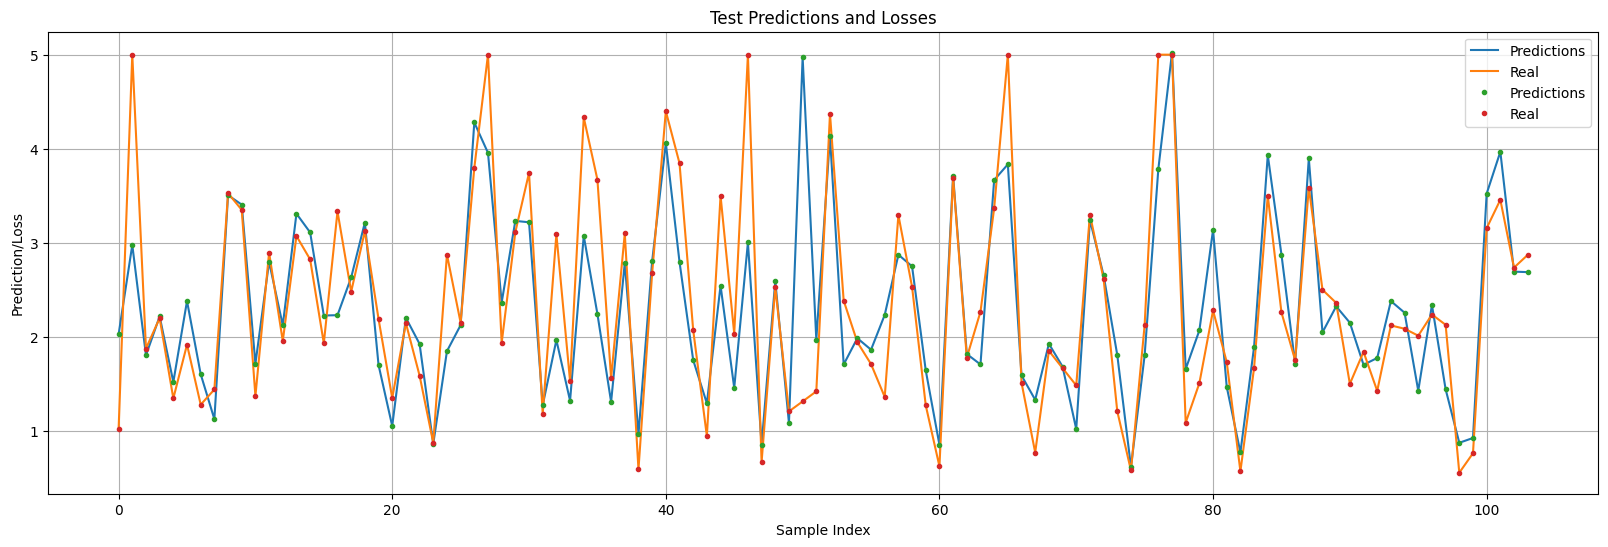

In [19]:
cfh.eval()
with torch.inference_mode():
    test_preds = []
    test_reals = []
    test_losses = []

    for i in range(len(x_test_tensor)):
        # Get the predictions and losses for the current epoch
        test_pred = cfh(x_test_tensor[i])
        test_real = y_test_tensor[i].detach().numpy()
        test_loss = loss_fn(test_pred, y_test_tensor)
        if i % 20 ==0 :
            # Accumulate the predictions and losses
            test_preds.append(test_pred.item())  # Assuming test_pred is a scalar
            test_reals.append(test_real.item())  # Assuming test_real is a scalar
            test_losses.append(test_loss.item())

# Plot the test predictions with stars
plt.figure(figsize=(20, 6))
plt.plot(range(len(test_preds)), test_preds, label='Predictions')
plt.plot(range(len(test_reals)), test_reals, label='Real')
plt.plot(range(len(test_preds)), test_preds, marker='.', linestyle='', label='Predictions')
plt.plot(range(len(test_reals)), test_reals, marker='.', linestyle='', label='Real')
plt.grid(True)
# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Prediction/Loss')
plt.title('Test Predictions and Losses')
plt.legend()
plt.show()


In [28]:
import torch
import gc

# Release GPU memory
torch.cuda.empty_cache()

# Release CPU memory
gc.collect()

3383

Early stop

In [31]:
batch_size = 32
Etrain_history = []
Eval_history = []
Etrain_loss = 0
Eval_loss = 0
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 5  # Adjust this based on your preference
cfh.load_state_dict(torch.load('cfh_empty.pth'))

<All keys matched successfully>

In [32]:
torch.manual_seed(42)
cont = 0
while True:
    
    for i in range(0, len(x_train_tensor), batch_size):
        cfh.train()
        Xbatch = x_train_tensor[i:i + batch_size]
        ybatch = y_train_tensor[i:i + batch_size]
        y_pred = cfh(Xbatch)
        train_loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    # Validation
    cfh.eval()
    with torch.no_grad():
        eval_pred = cfh(x_val_tensor)
        eval_loss = loss_fn(eval_pred, y_val_tensor)

    Etrain_history.append(train_loss.item())
    Eval_history.append(eval_loss.item())
    cont +=1
    print(f"{cont}Train Loss: {train_loss.item():.6f} "
          f"Validation Loss: {eval_loss.item():.6f} ")

    if eval_loss < best_val_loss:
        best_val_loss = eval_loss.item()
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print("Early stopping triggered!")
        print("MSE: %.2f" % best_val_loss)
        print("RMSE: %.2f" % np.sqrt(best_val_loss))
        break


1Train Loss: 0.449921 Validation Loss: 0.559953 
2Train Loss: 0.451358 Validation Loss: 0.521244 
3Train Loss: 0.471183 Validation Loss: 0.503202 
4Train Loss: 0.484170 Validation Loss: 0.490957 
5Train Loss: 0.496194 Validation Loss: 0.482027 
6Train Loss: 0.502050 Validation Loss: 0.473449 
7Train Loss: 0.499901 Validation Loss: 0.464549 
8Train Loss: 0.491566 Validation Loss: 0.456138 
9Train Loss: 0.478172 Validation Loss: 0.447013 
10Train Loss: 0.459776 Validation Loss: 0.439345 
11Train Loss: 0.452232 Validation Loss: 0.430597 
12Train Loss: 0.436922 Validation Loss: 0.424244 
13Train Loss: 0.428935 Validation Loss: 0.418037 
14Train Loss: 0.420059 Validation Loss: 0.412838 
15Train Loss: 0.407267 Validation Loss: 0.408097 
16Train Loss: 0.394721 Validation Loss: 0.403624 
17Train Loss: 0.377694 Validation Loss: 0.402515 
18Train Loss: 0.368146 Validation Loss: 0.398592 
19Train Loss: 0.361451 Validation Loss: 0.394749 
20Train Loss: 0.349783 Validation Loss: 0.391133 
21Train L

100 100


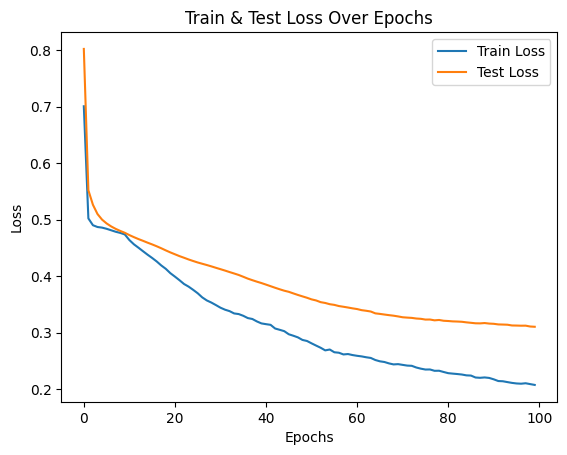

In [23]:
print(len(train_history), len(val_history))
plt.plot(train_history, label='Train Loss')
plt.plot(val_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train & Test Loss Over Epochs')
plt.legend()
plt.show()